In [1]:
#Mount my google drive
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


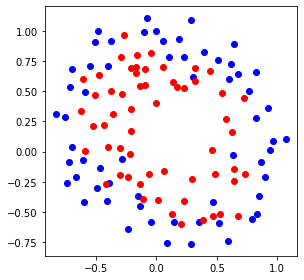

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy

with open('drive/My Drive/machine_learning_data/assignment07/data-nonlinear.txt', newline='') as file:
  data= np.genfromtxt(file, delimiter=',')

x = data[:, 0]
y = data[:, 1]
label = data[:, 2]
m = len(x)

x0 = x[label == 0]
y0 = y[label == 0]

x1 = x[label == 1]
y1 = y[label == 1]

plt.figure()
plt.scatter(x0, y0, c='b')
plt.scatter(x1, y1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [3]:
#initialize Train Parameter Setting the Theta number
theta = []

for i in range(10):
  tempTheta = []

  for j in range(10):
    tempTheta.append(j/10)
  theta.append(tempTheta)
theta = np.array(theta, dtype='float64')

print(theta)

[[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]]


In [0]:
#Define linear function & cost function & derivative function of cost function
def createMatrix(x, y):
  result = []
  for i in range(m):
    tempMatrix = []
    for j in range(len(theta)):
      for k in range(len(theta[j])):
        tempMatrix.append((x[i]**j) * (y[i]**k))
    result.append(tempMatrix)
  
  return np.array(result,dtype='float64')

In [0]:
inputMatrix = createMatrix(x, y)

In [0]:
thetaMatrix = []
for i in range(len(theta)):
  for j in range(len(theta[i])):
    thetaMatrix.append(theta[i][j])


thetaMatrixOverfit = np.array(thetaMatrix)
thetaMatrixRight = np.array(thetaMatrix)
thetaMatrixUnderfit = np.array(thetaMatrix)

In [0]:
#Define linear function & cost function & derivative function of cost function
def zFunc(thetaMatrix, inputMatrix):
  return np.matmul(thetaMatrix, inputMatrix.T)

def sigmaFunc(zFuncMatrix):
  return np.array(1 / (1 + np.exp(-1 * zFuncMatrix)),dtype='float64')

def jFunc(sigmaFuncMatrix, thetaMatrix, label, regularize):
  return 1/m * np.sum(((-1 * label) * np.log(sigmaFuncMatrix)) - ((1-label) * np.log(1-sigmaFuncMatrix))) + (regularize * np.sum(thetaMatrix**2))

def jPrimeTheta(sigmaFuncMatrix, label):
  return np.array(1 / m * np.matmul(sigmaFuncMatrix-label, inputMatrix),dtype='float64')

In [0]:
# Define update Function
learningRate = 0.7

def updateTheta(thetaMatrix, inputMatrix, label, regularizeLamda):
  tempUpdateTheta = jPrimeTheta(sigmaFunc(zFunc(thetaMatrix, inputMatrix)), label)

  updateTheta = thetaMatrix * (1 - learningRate * regularizeLamda) - learningRate * tempUpdateTheta
  return np.array(updateTheta,dtype='float64')

In [0]:
# Under Fitting Learning
trainingError_Underfit = []
accuracy_Underfit = []
counter_Underfit = 0
underfitLamda = 0.01

while(1):
  counter_Underfit += 1
  tempThetaMatrix = thetaMatrixUnderfit
  # Underfitting
  thetaMatrixUnderfit = updateTheta(thetaMatrixUnderfit, inputMatrix, label, underfitLamda)

  trainingError_Underfit.append(jFunc(sigmaFunc(zFunc(thetaMatrixUnderfit, inputMatrix)), thetaMatrixUnderfit, label, underfitLamda))

  accList = ((sigmaFunc(zFunc(thetaMatrixUnderfit, inputMatrix)) >= 0.5) == label).tolist()
  tempAccuracy = accList.count(True)

  accuracy_Underfit.append(tempAccuracy)
  # if (counter_Underfit % 1000) == 0:
  print('Accuracy : ' + str(tempAccuracy))
  print('Training Error : ' + str(jFunc(sigmaFunc(zFunc(thetaMatrixUnderfit, inputMatrix)), thetaMatrixUnderfit, label, underfitLamda)))

  break_condition = 0
  for i in range(len(thetaMatrix)):
    if round(tempThetaMatrix[i], 8) == round(thetaMatrixUnderfit[i], 8):
      break_condition = break_condition + 1
  if break_condition == 100:
    print('Finish the Learning')
    break

In [0]:
# Right Fitting Learning
trainingError_Right = []
accuracy_Right = []
counter_Right = 0
rightLamda = 0.0001

while(1):
  counter_Right += 1
  tempThetaMatrix = thetaMatrixRight

  thetaMatrixRight = updateTheta(thetaMatrixRight, inputMatrix, label, rightLamda)

  trainingError_Right.append(jFunc(sigmaFunc(zFunc(thetaMatrixRight, inputMatrix)), thetaMatrixRight, label, rightLamda))

  accList = ((sigmaFunc(zFunc(thetaMatrixRight, inputMatrix)) >= 0.5) == label).tolist()
  tempAccuracy = accList.count(True)

  accuracy_Right.append(tempAccuracy)
  if (counter_Right % 1000) == 0:
    print('Accuracy : ' + str(tempAccuracy))
    print('Training Error : ' + str(jFunc(sigmaFunc(zFunc(thetaMatrixRight, inputMatrix)), thetaMatrixRight, label, rightLamda)))
    print('Counter : ' + str(counter_Right))

  break_condition = 0
  for i in range(len(thetaMatrix)):
    if round(tempThetaMatrix[i], 8) == round(thetaMatrixRight[i], 8):
      break_condition = break_condition + 1
  if break_condition == 100:
    print('Finish the Learning')
    break

In [0]:
# Over Fitting Learning
trainingError_Overfit = []
accuracy_Overfit = []
counter_Overfit = 0
overfitLamda = 0.000001

while(1):
  counter_Overfit += 1
  tempThetaMatrix = thetaMatrixOverfit
  # Overfitting
  thetaMatrixOverfit = updateTheta(thetaMatrixOverfit, inputMatrix, label, overfitLamda)

  trainingError_Overfit.append(jFunc(sigmaFunc(zFunc(thetaMatrixOverfit, inputMatrix)), thetaMatrixOverfit, label, overfitLamda))

  accList = ((sigmaFunc(zFunc(thetaMatrixOverfit, inputMatrix)) >= 0.5) == label).tolist()
  tempAccuracy = accList.count(True)

  accuracy_Overfit.append(tempAccuracy)
  if counter_Overfit % 1000 == 0:
    print('Accuracy : ' + str(tempAccuracy))
    print('Training Error : ' + str(jFunc(sigmaFunc(zFunc(thetaMatrixOverfit, inputMatrix)), thetaMatrixOverfit, label, overfitLamda)))
    print('Counter : ' + str(counter_Overfit))


  break_condition = 0
  for i in range(len(thetaMatrix)):
    if round(tempThetaMatrix[i], 8) == round(thetaMatrixOverfit[i], 8):
      break_condition = break_condition + 1
  if break_condition == 100:
    print('Finish the Learning')
    break
  if counter_Overfit > 1000000:
    break

In [14]:
# Display the Lamda value
print("\033[31m" + "Over Fit Lamda : " + str(overfitLamda))
print("\033[32m" + "Just Right Lamda : " + str(rightLamda))
print("\033[34m" + "Under Fit Lamda : " + str(underfitLamda) + "\033[0m")


Over Fit Lamda : 1e-06
Just Right Lamda : 0.0001
Under Fit Lamda : 0.01


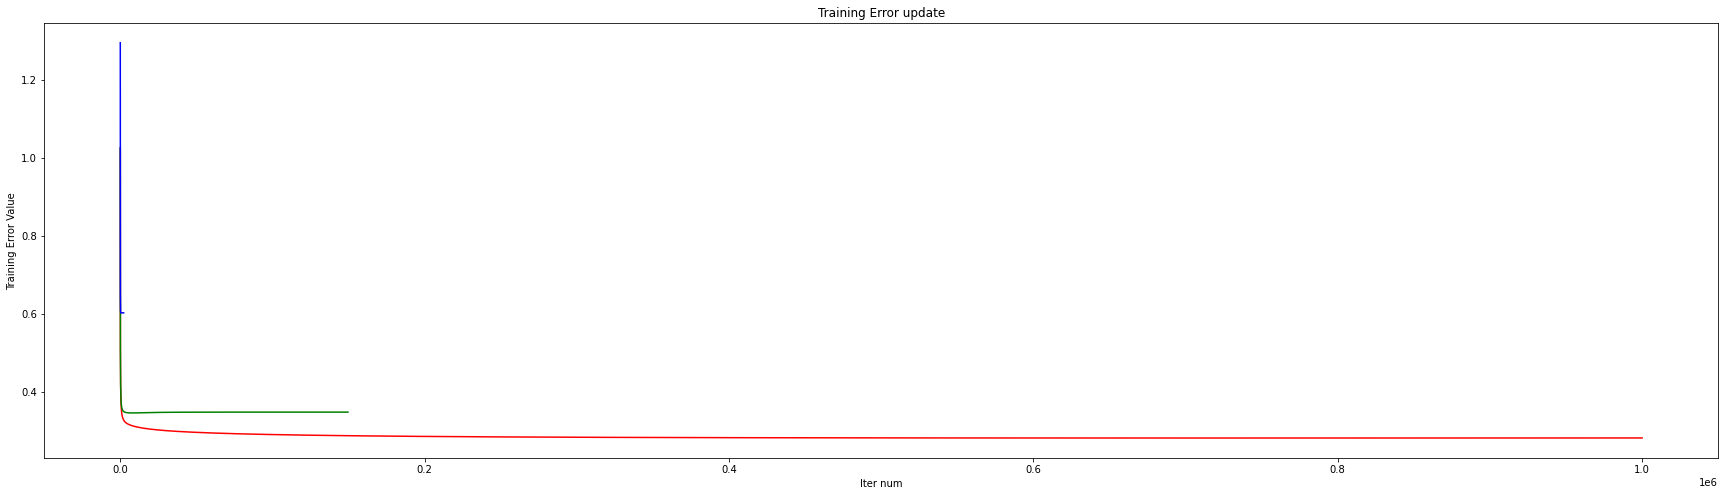

In [15]:
# Visualize of Training Error
plt.figure(figsize=(30, 8))
plt.plot(range(len(trainingError_Overfit)), trainingError_Overfit, c='r')
plt.plot(range(len(trainingError_Right)), trainingError_Right, c='g')
plt.plot(range(len(trainingError_Underfit)), trainingError_Underfit, c='b')

plt.title('Training Error update')
plt.xlabel('Iter num')
plt.ylabel('Training Error Value')
plt.show()

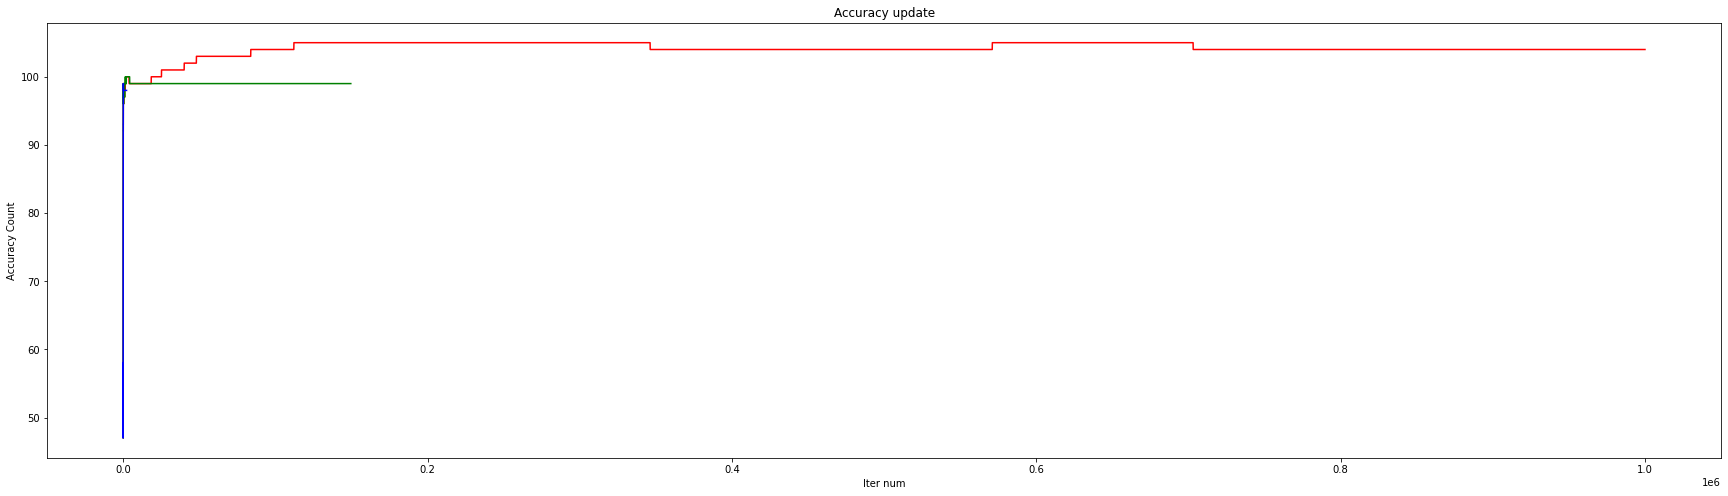

In [16]:
# Visualize of Accuracy
plt.figure(figsize=(30, 8))
plt.plot(range(len(accuracy_Overfit)), accuracy_Overfit , c='r')
plt.plot(range(len(accuracy_Right)), accuracy_Right, c='g')
plt.plot(range(len(accuracy_Underfit)), accuracy_Underfit , c='b')

plt.title('Accuracy update')
plt.xlabel('Iter num')
plt.ylabel('Accuracy Count')
plt.show()

In [17]:
# Display the Final Accuracy
print("\033[31m" + "My Final Accuracy is of Over fit : " + str(accuracy_Overfit[-1]/len(x)*100) + "%")
print("\033[32m" + "My Final Accuracy is of Just Right fit : " + str(accuracy_Right[-1]/len(x)*100) + "%")
print("\033[34m" + "My Final Accuracy of Underfit : " + str(accuracy_Underfit[-1]/len(x)*100) + "%" + "\033[0m")

My Final Accuracy is of Over fit : 88.13559322033898%
My Final Accuracy is of Just Right fit : 83.89830508474576%
My Final Accuracy of Underfit : 83.05084745762711%


In [0]:
def zFuncForPlot(x, y, thetaMatrix):
  theta = thetaMatrix.reshape(10, 10)
  result = 0
  for i in range(len(theta)):
    for j in range(len(theta[i])):
      result += theta[i][j] * (x**i) * (y**j)
  return result

def sigmaFuncForPlot(x, y, thetaMatrix):
  return 1/(1+np.exp(-1 * zFuncForPlot(x, y, thetaMatrix)))

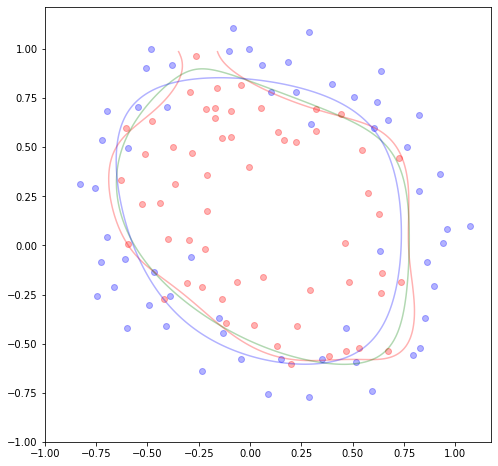

In [19]:
#Visualize of obtained Classifier
plotX = np.arange(-1, 1, 0.01)
plotY = np.arange(-1, 1, 0.01)
plotX, plotY = np.meshgrid(plotX, plotY)

plotX_1d = plotX.reshape(-1, 1)
plotY_1d = plotY.reshape(-1, 1)
tempPlot = sigmaFuncForPlot(plotX_1d, plotY_1d, thetaMatrixOverfit)
overFitPlot = tempPlot.reshape(200, 200)

tempPlot = sigmaFuncForPlot(plotX_1d, plotY_1d, thetaMatrixRight)
rightPlot = tempPlot.reshape(200, 200)

tempPlot = sigmaFuncForPlot(plotX_1d, plotY_1d, thetaMatrixUnderfit)
underFitPlot = tempPlot.reshape(200, 200)


plt.figure(figsize=(8, 8))
plt.scatter(x0, y0, alpha=0.3, c='b')
plt.scatter(x1, y1, alpha=0.3, c='r')
plt.contour(plotX, plotY, overFitPlot, levels = [0.5], alpha=0.3, colors='red')
plt.contour(plotX, plotY, rightPlot, levels = [0.5], alpha=0.3, colors='green')
plt.contour(plotX, plotY, underFitPlot, levels = [0.5], alpha=0.3, colors='blue')
plt.plot()
plt.show()